### <span style='font-family:serif'><span style='color:#80144a'>For this final data science project conducted by IBM. I have planned to analyse the geography my hometown city 'chennai', one of the materopolitan city present in India. This project uses as many informations that can be retrived from a FourSquare API based on their 'venue explore options' and identifies best geographical location which could be regarded as a starting point of visit for any tourist coming to chennai. </span></span>

<span style="font-size:18px"><span style='font-family:serif'> Import all necessary python modules to process web-data and to represent them graphically </span></span>

In [528]:
import numpy as np # library to handle data in a vectorized manner
! pip install geopy
! pip install folium
! pip install termcolor

from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
import math
from math import sin, cos, sqrt, atan2, radians # to convert geo coordinates to distance in km
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests
from bs4 import BeautifulSoup
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Libraries imported.


<span style="font-size:18px"><span style='font-family:serif'> The url(https://chennaiiq.com/chennai/latitude_longitude_areas.asp) contains the latitudes and longitudinal coordinates of different major areas/regions present in <span style="color:red">chennai city</span>. Hence i have fetched this url link and processed the desired table using the python module beautifulsoup </span></span>

In [529]:
url = 'https://chennaiiq.com/chennai/latitude_longitude_areas.asp'
r = requests.get(url)
html_data = r.text
soup = BeautifulSoup(html_data, "html.parser")
soup.head.title # get the title of a web-page just to make sure it is working correctly

<title>Chennai Latitude Longitude, Chennai Latitude, Chennai Logitude</title>

In [530]:
tables = soup.find("table", attrs={"class": "TBox"}) 

<span style="font-size:18px"><span style='font-family:serif'> It should be noted that the latitudes and longitudes obtained from the url are not represented in the decimal form. Hence it is better to convert them into decimal before going for the next step. The python function 'convert' takes the coordinates of latitude and longitues in Deg/Min/Sec unit and convert them in to decimal degrees.<br>
<span style='color:#12686e'> The final processed entries are stored as a dataframe 'chennai_data'.</span></span></span>

In [531]:
def convert(coords):
    multiplier = 1 if coords[-1] in ['N', 'E'] else -1
    coords = coords[:-1].strip()
    coords = coords.replace(u'°',u' ').replace("'"," ").replace('"',' ').replace(u'\xa0', u' ').strip()
    FormattedCoordinates = multiplier * sum(float(x) / 60 ** n for n, x in enumerate(coords.split(' ')))
    return (FormattedCoordinates)


In [532]:
table_data = []
index = ['S.No.', 'Location', 'Latitude', 'Longitude']
chennai_data = pd.DataFrame(columns=['S.No.', 'Location', 'Latitude', 'Longitude'])
for tr in table.find_all("tr", attrs={"class": "tab"}):
    col = tr.find_all("td")
    try:
        s_no = col[0].text.strip()
        location = col[1].text.strip()
        Latitude = convert(col[2].text)
        longitude = convert(col[3].text)
        chennai_data = chennai_data.append({"S.No.":s_no, "Location":location, "Latitude":Latitude, "Longitude":longitude}, ignore_index=True)
    except:
        pass
        break


In [533]:
chennai_data.head()

,S.No.,Location,Latitude,Longitude
0,1,Adyar Bus Debot.,12.997222,80.256944
1,2,Adyar Signal,13.006389,80.257500
2,3,Alandur,13.007778,80.209722
3,4,Ambattur,13.110000,80.170000
4,5,Anna Arch,13.074444,80.218333


<span style="color:#12686e"><span style="font-size:20px"><span style='font-family:serif'> <br>1) Lets create and visualize the location map of all area in chennai city using Folium. <br>Two different maps of chennai are displayed, first on the left is generated using the default folium tiles <span style='color:red'>(OpenStreetMap)</span>. The second one on the right is made using <span style='color:red'>"Stamen Watercolor"</span> tiles to empahsises the city is located near costal region.<br></span></span></span>

In [550]:
latitude = 12.997222 # location of Adyar Bus Debot
longitude = 80.256944
# i chose this coord, because it is the center of all locations
# create map of Chennai city using latitude and longitude values
map_chennai_basic = folium.Map(location=[latitude, longitude],tiles='OpenStreetMap',zoom_start=11)
# add markers to ma
for lat, lng, label in zip(chennai_data['Latitude'], chennai_data['Longitude'], chennai_data['Location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='cyan',
        fill=True,
        fill_color='#ab1d64',
        fill_opacity=0.8,
        parse_html=False).add_to(map_chennai_basic)  
    
map_chennai_watercolor = folium.Map(location=[latitude, longitude],tiles="Stamen Watercolor",zoom_start=11)
# add markers to ma
for lat, lng, label in zip(chennai_data['Latitude'], chennai_data['Longitude'], chennai_data['Location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='cyan',
        fill=True,
        fill_color='#ab1d64',
        fill_opacity=0.8,
        parse_html=False).add_to(map_chennai_watercolor)     
    
map_chennai_basic,map_chennai_watercolor
from IPython.display import display, HTML

htmlmap = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           .format(map_chennai_basic.get_root().render().replace('"', '&quot;'),500,500,
                   map_chennai_watercolor.get_root().render().replace('"', '&quot;'),500,500))
display(htmlmap)

<span style="font-size:18px"><span style='font-family:serif'><br><span style='color:green'>2) Now we are going to use Foursquare API to get the information of various places that are present around each areas.</span><br>
Before starting the Foursquare API, we will set up all necessary credentials such as 
    <span style="font-weight:bold">CLIENT_ID, CLIENT_SECRET, ACCESS_TOKEN</span> and <span style="font-weight:bold">VERSION</span> to seamlessly integrate with the API.<br></span></span>

In [535]:
CLIENT_ID = 'M34ZNX3WLFJGWKDH5YL5O4BCN1W1GKQQXH2YUKAJX4FQ1BY3' # your Foursquare ID
CLIENT_SECRET = 'NNVA0TDYMEFXTYYAMRGRZWDA5T2RG4JZPYZ442XZDEF2GLWJ' # your Foursquare Secret
ACCESS_TOKEN = 'ZS31YL0V3FW0HMJPAYQT3DCQIN2VNBRYRJH4RF4J40ASANZL' # your FourSquare Access Token
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: M34ZNX3WLFJGWKDH5YL5O4BCN1W1GKQQXH2YUKAJX4FQ1BY3
CLIENT_SECRET:NNVA0TDYMEFXTYYAMRGRZWDA5T2RG4JZPYZ442XZDEF2GLWJ


<span style="font-size:18px"><span style='font-family:serif'>3) Here, we are going to use FrontSquare as a medium to explore all places that are present with in 10 kilometer radius from the latitudes and longitudes.The json formatted output of Frontsquare results are processed carefully to choose only those columns that are going to be very helpful for the analysis. <br> <ul><li><span style="color:#0f1669"><span style="font-size:18px"><span style='font-family:serif'> For example, by default, FourSquare groups venues based on their purposes which we are going to fetch it from results variable and store them in 'category_name'.</span></span></span><br></li><li><span style="font-size:18px"><span style='font-family:serif'> The output of all processed entries are stored as a dataframe 'venues_list'.</span></span></li></ul><br></span></span>


In [536]:
LIMIT = 20
radius = 10000 # fetch all places thar are withn 10 kilometer radius
def ExploreNearbyPlaces(names, latitudes, longitudes, radius=10000):
    venues_list = []
    #names, latitudes, longitudes = ['Adyar Bus Debot'], [latitude], [longitude]
    #names, latitudes, longitudes = names[:3], latitudes[:3], longitudes[:3]
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng,ACCESS_TOKEN, VERSION, radius, LIMIT)
        results = requests.get(url).json()
        for i in range(len(results['response']['groups'][0]['items'])):
            try:
                category_name = results['response']['groups'][0]['items'][i]['venue']['categories'][0]['name']
                #venue_address = results['response']['groups'][0]['items'][i]['venue']['location']['address']
                venue_name = results['response']['groups'][0]['items'][i]['venue']['name']
                venue_lat = results['response']['groups'][0]['items'][i]['venue']['location']['lat']
                venue_lng = results['response']['groups'][0]['items'][i]['venue']['location']['lng']
                venue_distance = results['response']['groups'][0]['items'][i]['venue']['location']['distance'] 
                venues_list.append([name, lat, lng,category_name, venue_name, venue_lat, venue_lng, venue_distance])
            except:   
                pass
    venues_list = pd.DataFrame(venues_list)        
    venues_list.columns = ['AreaName', 'AreaLatitude', 'AreaLongitude', 
                  'CategoryName', 'VenueName', 'VenueLatitide', 'VenueLongitude', 
                  'VenueDistance']
    return venues_list

venues_list = ExploreNearbyPlaces(names=chennai_data['Location'],
                                   latitudes=chennai_data['Latitude'],
                                   longitudes=chennai_data['Longitude']
                                  )   
venues_list = venues_list.drop_duplicates(subset='VenueName', keep='first')

<span style="font-weight:bold"><span style="font-size:18px"><span style='font-family:serif'>The following cell does some basic operations on venues_list such as seeing how datas are stored, what is the types of each coulmn, name of columns and so on.</span></span></span>

In [537]:
print (venues_list.head())
print('\n')
print (venues_list['CategoryName'].unique())
print('\n')
venues_list[venues_list['CategoryName'] == 'Multiplex']

           AreaName  AreaLatitude  AreaLongitude               CategoryName  \
0  Adyar Bus Debot.     12.997222      80.256944                  Juice Bar   
1  Adyar Bus Debot.     12.997222      80.256944                      Beach   
2  Adyar Bus Debot.     12.997222      80.256944    North Indian Restaurant   
3  Adyar Bus Debot.     12.997222      80.256944  Middle Eastern Restaurant   
4  Adyar Bus Debot.     12.997222      80.256944                      Beach   

                                    VenueName  VenueLatitide  VenueLongitude  \
0                   Fruit Shop On Greams Road      13.001280       80.267439   
1  Besant Nagar Beach (Edward Elliot's Beach)      13.000506       80.270840   
2                            Bombay Brassiere      13.006961       80.256419   
3                          Zaitoon Restaurant      12.996861       80.256178   
4                      4th Seaward Road Beach      12.979286       80.264673   

   VenueDistance  
0           1224  
1     

,AreaName,AreaLatitude,AreaLongitude,CategoryName,VenueName,VenueLatitide,VenueLongitude,VenueDistance
46,Alandur,13.007778,80.209722,Multiplex,Luxe Cinemas,12.991041,80.216962,2021
76,Ambattur,13.110000,80.170000,Multiplex,Palazzo,13.050383,80.209541,7900
141,Anna Statue,13.068056,80.271944,Multiplex,Escape Cinemas,13.058746,80.264170,1335
147,Anna Statue,13.068056,80.271944,Multiplex,Serene Sathyam,13.055665,80.258041,2043
279,Chennai Airport,12.992222,80.169444,Multiplex,IMAX®,12.990639,80.216310,5086
1457,Poonamallee,13.042500,80.100833,Multiplex,PVR Cinemas Grand Galada Center Mall,12.978902,80.161557,9669
1847,Tiruvottiyur,13.160000,80.289722,Multiplex,S2 Cinemas,13.112313,80.236524,7838


<span style="font-weight:bold"><span style="font-size:22px"><span style='font-family:serif'>Analysis 1)</span></span></span> <br><br><span style="font-size:18px"><span style='font-family:serif'><span style="color:#91240f">
In this analysis, we are going to analyse the frequence of occurence of each venue categories ('CategoryName') for a whole chennai city and also report their frequencies in individual areas.</span></span></span>

<span style="color:#6c6e0c"><span style="font-size:18px"><span style='font-family:serif'>From the below figure, it is evident that venue category 'Indian Restaurant','Hotel', 'cafe' has more number of venues than other category in chennai.</span></span></span>

<AxesSubplot:title={'center':'Bar Plot of Frequency of different category in Chennai'}, xlabel='Venue Category Names', ylabel='Venue Frequency'>

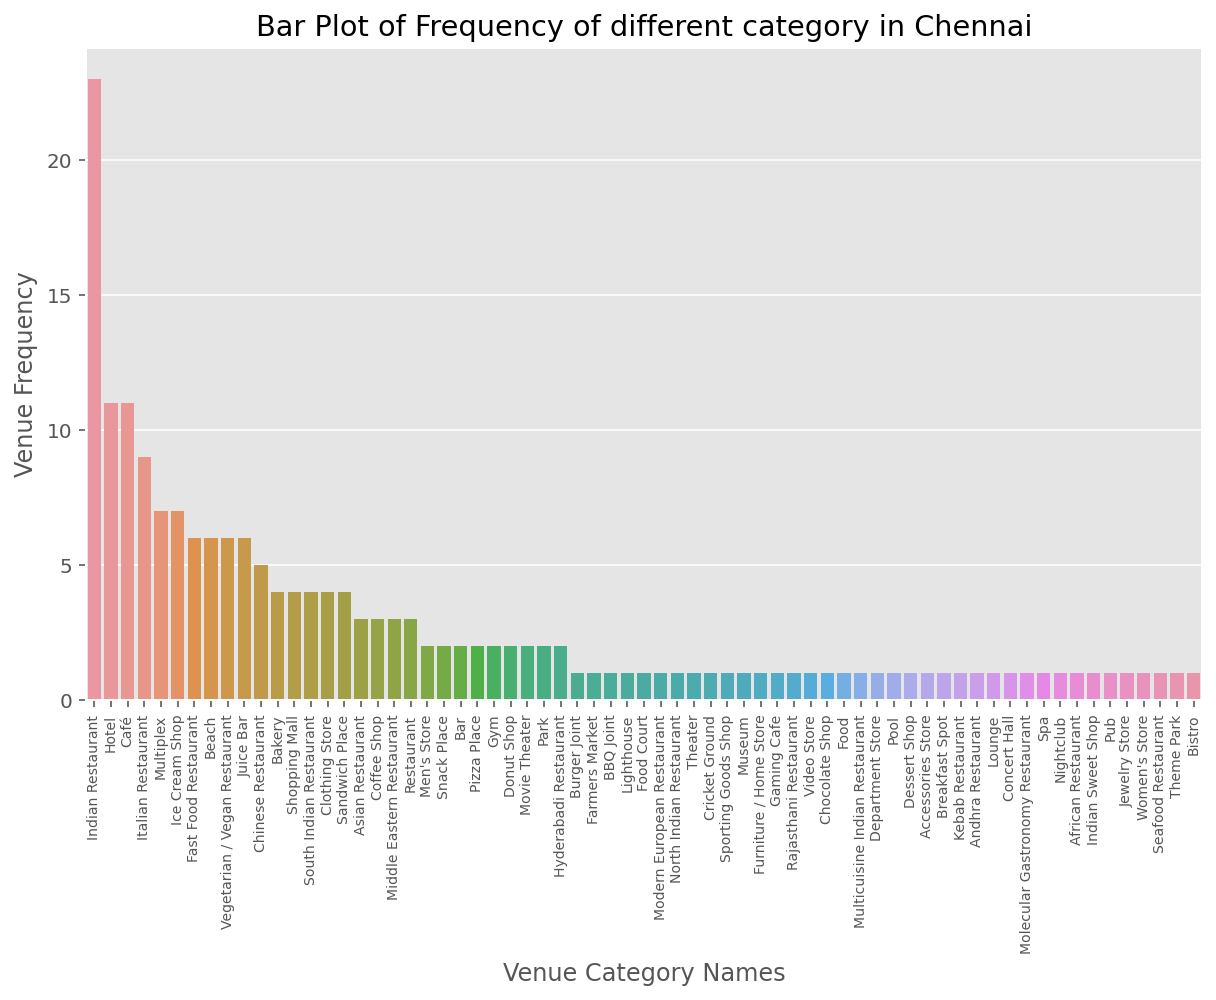

In [538]:
venues_category_total = venues_list['CategoryName'].value_counts()
#print(venues_category_total.values)

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.bar(venues_category_total.index, venues_category_total.values)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel("Venue Category Names")
plt.ylabel("Venue Frequency")
plt.title("Bar Plot of Frequency of different category in Chennai")
sns.color_palette("cubehelix", as_cmap=True)
sns.barplot(x=venues_category_total.index, y=venues_category_total.values)


In [539]:
a = venues_list.groupby('AreaName')#.value_counts()#.to_frame('CategoryName')
print('Fequency of a Category Name:')
print(venues_list['CategoryName'].value_counts().head()) # value_count of each category. Normalize to create weigths
Category_counts_total = venues_list['CategoryName'].value_counts()
#print(Category_counts_total.loc['Hotel'])
Category_names = Category_counts_total.index.values


Fequency of a Category Name:
Indian Restaurant     23
Hotel                 11
Café                  11
Italian Restaurant     9
Multiplex              7
Name: CategoryName, dtype: int64


<span style="color:#0b520d"><span style="font-weight:bold"><span style="font-size:18px"><span style='font-family:serif'>OBSERVATION:</span></span></span>
<br>
<span style="font-size:18px"><span style='font-family:serif'>If you observe from the data. Some categories are more common than other, this could be either due to their popularity or it is easy to establish that venue than other. For example restuarant is more frequently seen than museum or theater. To address this, i am going to try normalizing their values by dividing the value_count of each category in a area with total category count.</span></span></span>

In [540]:
venues_CategoryName = venues_list.groupby(['AreaName', 'CategoryName']).size().unstack(fill_value=0) # groupby based on area
AreaNames = venues_CategoryName.index.values
array_total = []
for area in AreaNames:
    array = []
    for category in Category_names:
        array.append(venues_CategoryName.loc[area, category] / Category_counts_total.loc[category])
    array_total.append(array)
CategoriesNormalized = pd.DataFrame(array_total)  
CategoriesNormalized.set_index(AreaNames, inplace=True)
CategoriesNormalized.columns = Category_names
CategoriesNormalized.head() # this normalized data table can help us to get many new interesting informations.
        
        

,Indian Restaurant,Hotel,Café,Italian Restaurant,Multiplex,Ice Cream Shop,Fast Food Restaurant,Beach,Vegetarian / Vegan Restaurant,Juice Bar,Chinese Restaurant,Bakery,Shopping Mall,South Indian Restaurant,Clothing Store,Sandwich Place,Asian Restaurant,Coffee Shop,Middle Eastern Restaurant,Restaurant,Men's Store,Snack Place,Bar,Pizza Place,Gym,Donut Shop,Movie Theater,Park,Hyderabadi Restaurant,Burger Joint,Farmers Market,BBQ Joint,Lighthouse,Food Court,Modern European Restaurant,North Indian Restaurant,Theater,Cricket Ground,Sporting Goods Shop,Museum,Furniture / Home Store,Gaming Cafe,Rajasthani Restaurant,Video Store,Chocolate Shop,Food,Multicuisine Indian Restaurant,Department Store,Pool,Dessert Shop,Accessories Store,Breakfast Spot,Kebab Restaurant,Andhra Restaurant,Lounge,Concert Hall,Molecular Gastronomy Restaurant,Spa,Nightclub,African Restaurant,Indian Sweet Shop,Pub,Jewelry Store,Women's Store,Seafood Restaurant,Theme Park,Bistro
AVM Studio,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.2,0.00,0.25,0.00,0.25,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Adyar Bus Debot.,0.000000,0.181818,0.181818,0.222222,0.000000,0.142857,0.000000,0.666667,0.166667,0.333333,0.0,0.00,0.00,0.00,0.25,0.00,0.333333,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Adyar Signal,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.0,0.25,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alandur,0.086957,0.363636,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.166667,0.000000,0.0,0.00,0.25,0.00,0.00,0.00,0.666667,0.333333,0.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ambattur,0.173913,0.000000,0.181818,0.111111,0.142857,0.285714,0.166667,0.000000,0.166667,0.000000,0.0,0.00,0.25,0.25,0.00,0.25,0.000000,0.000000,0.000000,0.000000,0.0,0.5,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<span style="font-size:18px"><span style='font-family:serif'>Now,that we have dataframe containing normalized entries across columns and rows. we could now ask following questions like</span></span><br>
<span style='color:#b30b13'><span style="font-size:18px"><span style='font-family:serif'>1) Which area contain maximum cafe <br></span></span></span>
<span style='color:#096d8f'><span style="font-size:18px"><span style='font-family:serif'>2) List top 5 areas that have maximum best venues etc</span></span></span><br>



The Area: AVM Studio contain many cafe venues than other areas in Chennai City.


Top 5 areas that contain maximum venues in chennai:
Alandur             5.819641
Adyar Bus Debot.    5.812049
Anna Statue         5.634215
Anna Arch           5.586957
Tiruvottiyur        4.999467
dtype: float64





<AxesSubplot:title={'center':'Top 5 area with maximum venues in chennai'}, xlabel='Area Names', ylabel='Normalized Values'>

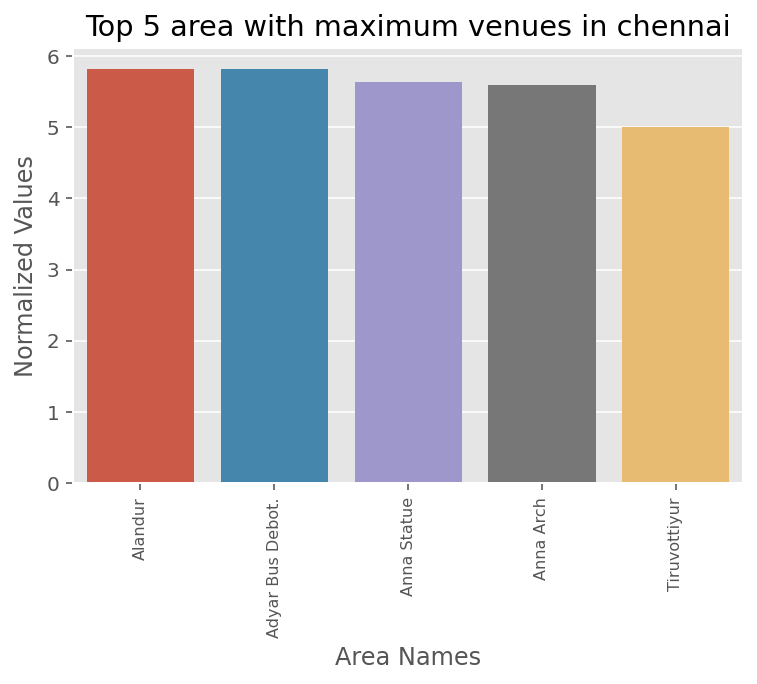

In [541]:
print('\n')
print(colored('The Area: {} contain many cafe venues than other areas in Chennai City.'.format(CategoriesNormalized.sort_values('Café',).index[0]), 'red'))
print('\n')
print(colored('Top 5 areas that contain maximum venues in chennai:','green'))
print(CategoriesNormalized.sum(axis=1).sort_values(ascending=False).head(5))
print('\n\n')
plt.xticks(rotation=90,fontsize=8)
plt.title('Top 5 area with maximum venues in chennai')
plt.xlabel('Area Names')
plt.ylabel('Normalized Values')
sns.color_palette("hls", 8)
sns.barplot(x=CategoriesNormalized.sum(axis=1).sort_values(ascending=False).head(5).index, y=CategoriesNormalized.sum(axis=1).sort_values(ascending=False).head(5).values)

<span style="font-weight:bold"><span style="font-size:18px"><span style='font-family:serif'>Lets map the top 10 area of maximum venue in folium</span></span></span>

In [542]:
top_10_areas = CategoriesNormalized.sum(axis=1).sort_values(ascending=False).head(10).index
print(top_10_areas)
latitude = 12.997222 # location of Adyar Bus Debot
longitude = 80.256944
# i chose this coord, because it is the center of all locations
# create map of Chennai city using latitude and longitude values
map_chennai_basic = folium.Map(location=[latitude, longitude],tiles='OpenStreetMap',zoom_start=12)
# add markers to ma
for lat, lng, label in zip(chennai_data['Latitude'], chennai_data['Longitude'], chennai_data['Location']):
    if label in top_10_areas:
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=7,
            popup=label,
            color='#04d604',
            fill=True,
            fill_color='#fc1500',
            fill_opacity=0.8,
            parse_html=False).add_to(map_chennai_basic) 
    else:
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='cyan',
            fill=True,
            fill_color='#ab1d64',
            fill_opacity=0.5,
            parse_html=False).add_to(map_chennai_basic) 
        
map_chennai_basic


Index(['Alandur', 'Adyar Bus Debot.', 'Anna Statue', 'Anna Arch',
       'Tiruvottiyur', 'Poonamallee', 'Chola', 'Ambattur', 'Avadi', 'MRTS'],
      dtype='object')


<span style="font-weight:bold"><span style="font-size:18px"><span style='font-family:serif'>TASK: Finding the closest area to the corrdinates specified by the user. This could be either coordinates taken from a GPS system or user can specify it.</span></span></span>

In [543]:
user_lat, user_lng = 13.067439, 80.237617 # latitudes and longitudes given by the user in decimal degrees
NearestChennaiArea = []
R = 6373.0
for loc,lat,lng in zip(chennai_data['Location'],chennai_data['Latitude'],chennai_data['Longitude']):
    lat1 = radians(user_lat)
    lon1 = radians(user_lng)
    lat2 = radians(lat)
    lon2 = radians(lng)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    NearestChennaiArea.append([loc,distance])
NearestChennaiArea = sorted(NearestChennaiArea, key = lambda x:float(x[1]))                               
print(colored(NearestChennaiArea[0][0],'red'),'is the nearest area in chennai located {} km from your specified latitude and longitude'.format(NearestChennaiArea[0][1]))   
    
    

Loyolo College is the nearest area in chennai located 0.5288299700189477 km from your specified latitude and longitude


<span style="font-weight:bold"><span style="font-size:18px"><span style='font-family:serif'>Clustering Analysis:</span></span></span><br>
<span style="font-size:18px"><span style='font-family:serif'>
Here, we are going to cluster all area names by using their latitudes and longitudes using K-Means clustering algorithm.
The value of 'k' in k-means was increated to one count using range function. Optimal 'k' was obtained using elbow plot.</span></span>

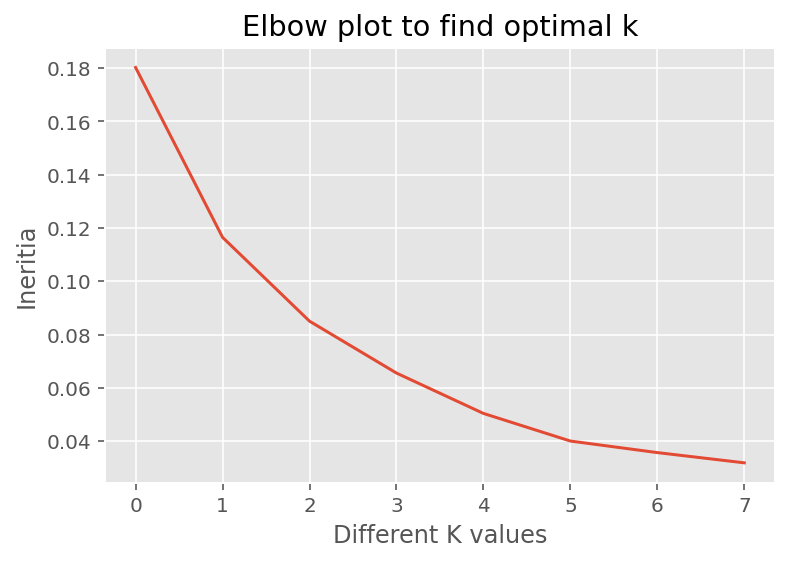

In [544]:
coord = np.asarray(chennai_data[['Latitude','Longitude']].values, dtype='float') # latitude and longitude in np array form
k_means_inertia = []
for i in range(2,10):
    #print(i)
    kmeans = KMeans(n_clusters=i).fit(coord)
    k_means_inertia.append(kmeans.inertia_)
plt.plot(range(len(k_means_inertia)), k_means_inertia)    
plt.xlabel('Different K values')
plt.ylabel('Ineritia')
plt.title('Elbow plot to find optimal k')
plt.show()    
    
    

<span style="color:#78106a"><span style="font-size:18px"><span style='font-family:serif'>The optimal k value is somewhere between 4 and 5. Here i am taking 5 as the number of clusters for the k-mean algorithm</span></span></span>

In [552]:
kmeans = KMeans(n_clusters=5).fit(coord)

color_codes = {0:['#800442','#f2057c'], 1:['#55056b','#ae0bdb'],2:['#042469','#0447d6'],3:['#046e42','#08d17e'],
               4:['#425205','#add907'],5:['#854103','#f27707']}
area_color = {}
for i in range(len(chennai_data['Location'])):
    area_color[chennai_data['Location'][i]] = color_codes[kmeans.labels_[i]]

latitude = 12.997222 
longitude = 80.256944
map_chennai_cluster = folium.Map(location=[latitude, longitude],tiles='OpenStreetMap',zoom_start=12)

for lat, lng, labels in zip(chennai_data['Latitude'], chennai_data['Longitude'], chennai_data['Location']):
    label = folium.Popup(labels, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color=area_color[labels][0],
        fill=True,
        fill_color=area_color[labels][1],
        fill_opacity=0.8,
        parse_html=False).add_to(map_chennai_cluster) 
        
map_chennai_cluster

<span style="font-size:22px"><span style='font-family:serif'>Summary Statistics for each cluster</span></span>

In [553]:
area_group = {}
for i in range(len(chennai_data['Location'])):
    area_group[chennai_data['Location'][i]] = kmeans.labels_[i]
    
#print(CategoriesNormalized.columns)    
for k_cluster in range(5):    
    venue_dictionary_per_cluster = {}
    for area,j in area_group.items():
        if k_cluster == j:
            if area in CategoriesNormalized.index:
                for ven in CategoriesNormalized.columns:
                    if ven not in venue_dictionary_per_cluster:
                        venue_dictionary_per_cluster[ven] = 0.0
                    if ven in venue_dictionary_per_cluster:
                        val = venue_dictionary_per_cluster[ven]
                        #print(area,ven)
                        #print(CategoriesNormalized.loc[area,ven])
                        val += CategoriesNormalized.loc[area,ven]
                        venue_dictionary_per_cluster[ven] = val

    top_5_venue = sorted([[k,p] for k, p in venue_dictionary_per_cluster.items() ], key = lambda x:float(x[1]), reverse=True )[:5]   # for each key (k), pair (p)     
    print('\n')
    print('Top 5 Venues of the cluster : '+str(k_cluster+1)+' is -')
    for k in top_5_venue:
        print(k[0])
    print('\n')
    #break       
#CategoriesNormalized.head()    
#area_group



Top 5 Venues of the cluster : 1 is -
Snack Place
Pizza Place
Park
BBQ Joint
Food Court




Top 5 Venues of the cluster : 2 is -
Bar
Lighthouse
Cricket Ground
Furniture / Home Store
Gaming Cafe




Top 5 Venues of the cluster : 3 is -
Farmers Market
Museum
Video Store
Food
Kebab Restaurant




Top 5 Venues of the cluster : 4 is -
Burger Joint
North Indian Restaurant
Department Store
Accessories Store
Spa




Top 5 Venues of the cluster : 5 is -
Sporting Goods Shop
Rajasthani Restaurant
Andhra Restaurant
Lounge
Molecular Gastronomy Restaurant




<span style="font-weight:bold"><span style="font-size:18px"><span style='font-family:serif'>Final Summary: 
For this final data science project we performed following task.</span></span></span><br>
<span style="font-size:18px"><span style='font-family:serif'>
1: Used BeautifulSoup to parse the web-content of chennai areas.<br>
2: Converted the latitutes and longitudes from Deg/Min/Sec to decimal degress.<br>
3: Mapping the geo corrdinates into Folium and represented them via two different tiles 'OpenStreetMap' and 'Stamen Watercolor'.<br>
4: FourSquare API is used to get the different venues for all the areas.<br>
5: Categorised different venues based on their category types and normalized them.<br>
6: Reported top 10 area having maximum venues in chennai.<br>
7: Finding the closest areas in chennai based on user supplied geo coordinates.<br>
8: Clustering of all areas corrdinates into 5 clusters using k-mean clustering and mapping their location in folium.<br>
9: Finally reported top 5 venues for each cluster.<br>
</span></span>